shape of data1: (160000,)
shape of data2: (160000,)
shape of data3: (160000,)


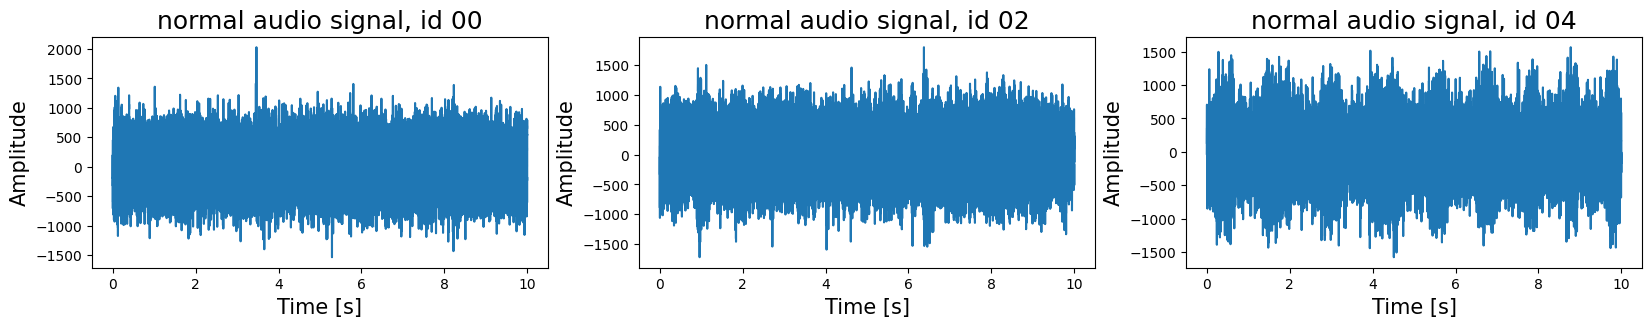

In [12]:
# Time domain representation of the audio signals

from scipy.io.wavfile import read 
import numpy as np
import matplotlib.pyplot as plt

samplerate1, data1 = read('/home/luca/AML/challenge2/data/dev_data/dev_data/slider/train/normal_id_00_00000000.wav')
samplerate2, data2 = read('/home/luca/AML/challenge2/data/dev_data/dev_data/slider/train/normal_id_02_00000000.wav')
samplerate3, data3 = read('/home/luca/AML/challenge2/data/dev_data/dev_data/slider/train/normal_id_04_00000000.wav')

print('shape of data1:', data1.shape)
print('shape of data2:', data2.shape)
print('shape of data3:', data3.shape)


duration1 = len(data1)/samplerate1
time1 = np.arange(0,duration1,1/samplerate1) #time vector

duration2 = len(data2)/samplerate2
time2 = np.arange(0,duration2,1/samplerate2) #time vector

duration3 = len(data3)/samplerate3
time3 = np.arange(0,duration3,1/samplerate3) #time vector

plt.figure(figsize=(20,3))
plt.subplot(1,3,1)
plt.plot(time1,data1)
plt.xlabel('Time [s]', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.title('normal audio signal, id 00', fontsize=18)

plt.subplot(1,3,2)
plt.plot(time2,data2)
plt.xlabel('Time [s]', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.title('normal audio signal, id 02', fontsize=18)

plt.subplot(1,3,3)
plt.plot(time3,data3)
plt.xlabel('Time [s]', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.title('normal audio signal, id 04', fontsize=18)

plt.show()



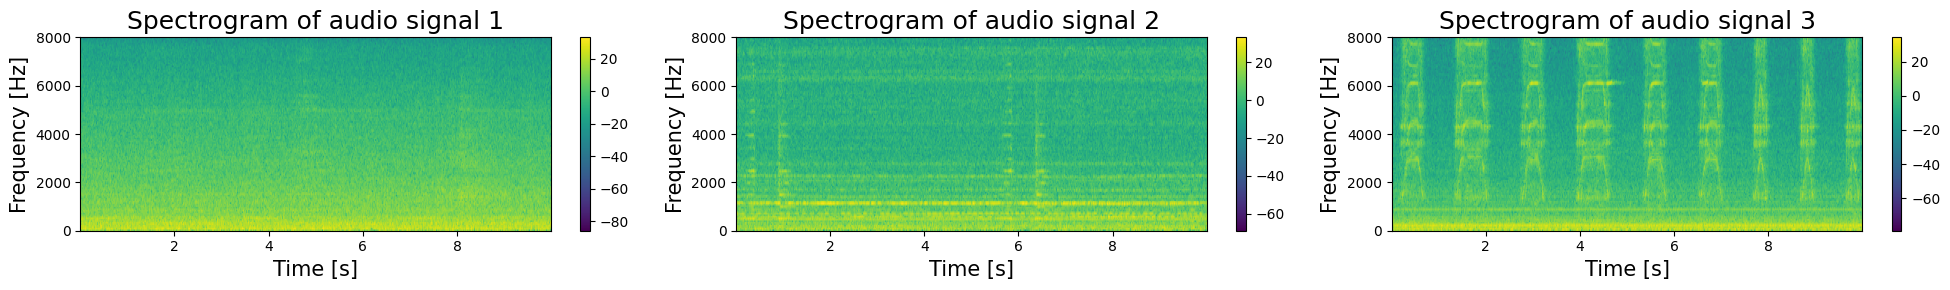

In [13]:
# Frequency domain representation of the audio signals (spectrogram)

plt.figure(figsize=(20, 3))

# Plot spectrogram of data1
plt.subplot(1, 3, 1)
plt.specgram(data1, Fs=samplerate1)
plt.xlabel('Time [s]', fontsize=15)
plt.ylabel('Frequency [Hz]', fontsize=15)
plt.title('Spectrogram of audio signal 1', fontsize=18)
plt.colorbar()

# Plot spectrogram of data2
plt.subplot(1, 3, 2)
plt.specgram(data2, Fs=samplerate2)
plt.xlabel('Time [s]', fontsize=15)
plt.ylabel('Frequency [Hz]', fontsize=15)
plt.title('Spectrogram of audio signal 2', fontsize=18)
plt.colorbar()

# Plot spectrogram of data3
plt.subplot(1, 3, 3)
plt.specgram(data3, Fs=samplerate3)
plt.xlabel('Time [s]', fontsize=15)
plt.ylabel('Frequency [Hz]', fontsize=15)
plt.title('Spectrogram of audio signal 3', fontsize=18)
plt.colorbar()

plt.tight_layout()
plt.show()


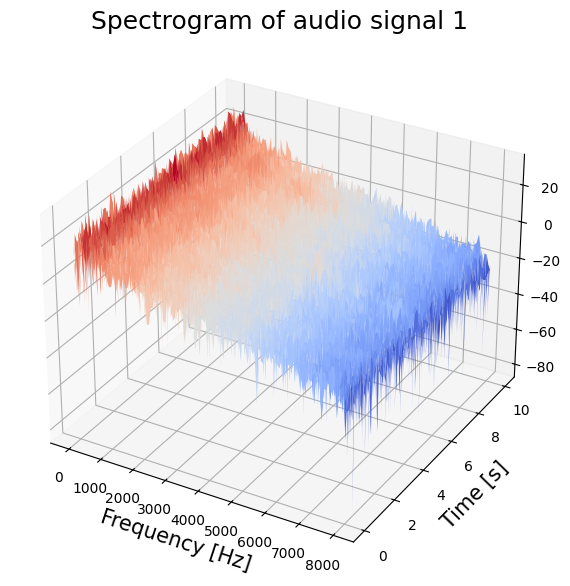

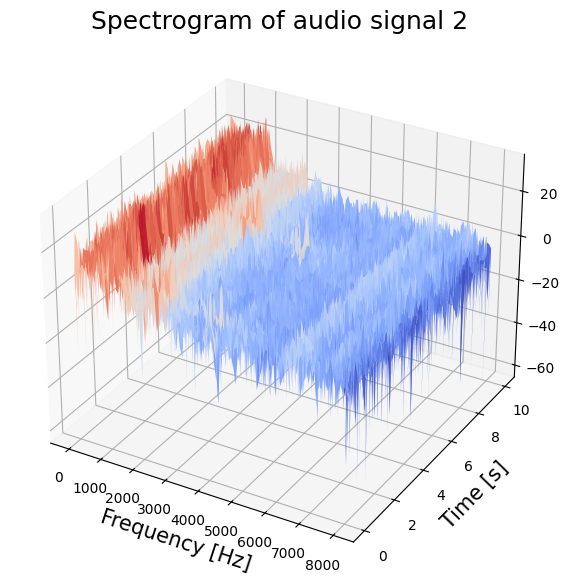

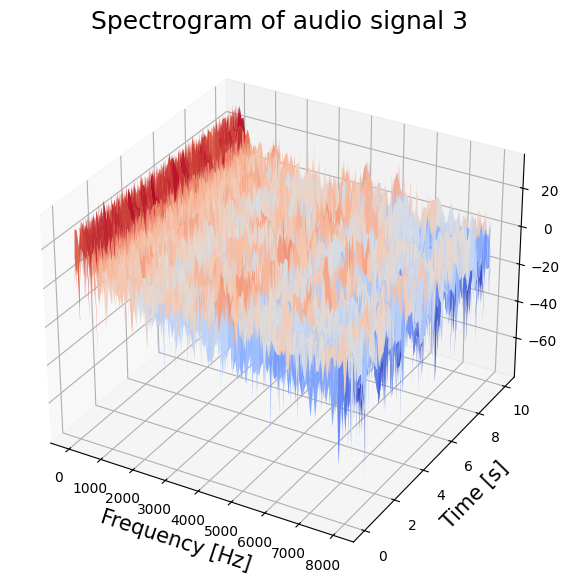

In [14]:
# 3D plot of the spectrogram

from scipy import signal # spectrogram function
from matplotlib import cm # colour map


# extract the spectrum
freq_bins1, timestamps1, spec1 = signal.spectrogram(data1, samplerate1)
freq_bins2, timestamps2, spec2 = signal.spectrogram(data2, samplerate2)
freq_bins3, timestamps3, spec3 = signal.spectrogram(data3, samplerate3)

# 3d plot
fig = plt.figure(figsize=(15,7))
ax = plt.axes(projection='3d')
ax.plot_surface(freq_bins1[:, None], timestamps1[None, :], 10.0*np.log10(spec1), cmap=cm.coolwarm)
ax.set_xlabel('Frequency [Hz]', fontsize=15)
ax.set_ylabel('Time [s]', fontsize=15)
ax.set_title('Spectrogram of audio signal 1', fontsize=18)
plt.show()

fig = plt.figure(figsize=(15,7))
ax = plt.axes(projection='3d')
ax.plot_surface(freq_bins2[:, None], timestamps2[None, :], 10.0*np.log10(spec2), cmap=cm.coolwarm)
ax.set_xlabel('Frequency [Hz]', fontsize=15)
ax.set_ylabel('Time [s]', fontsize=15)
ax.set_title('Spectrogram of audio signal 2', fontsize=18)
plt.show()

fig = plt.figure(figsize=(15,7))
ax = plt.axes(projection='3d')
ax.plot_surface(freq_bins3[:, None], timestamps3[None, :], 10.0*np.log10(spec3), cmap=cm.coolwarm)
ax.set_xlabel('Frequency [Hz]', fontsize=15)
ax.set_ylabel('Time [s]', fontsize=15)
ax.set_title('Spectrogram of audio signal 3', fontsize=18)
plt.show()


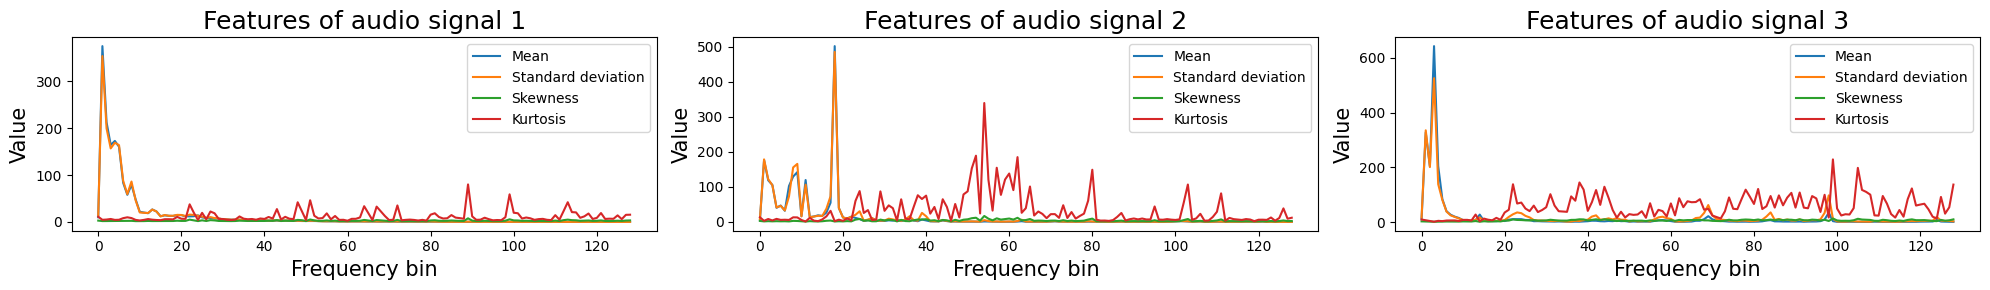

In [15]:
# Extracting features from the audio signals

from scipy.stats import skew, kurtosis

def extract_features(data, samplerate):
    # Calculate the spectrogram
    freq_bins, timestamps, spec = signal.spectrogram(data, samplerate)
    
    # Calculate the mean, standard deviation, skewness and kurtosis of the spectrogram
    mean_spec = np.mean(spec, axis=1)
    std_spec = np.std(spec, axis=1)
    skew_spec = skew(spec, axis=1)
    kurtosis_spec = kurtosis(spec, axis=1)
    
    return mean_spec, std_spec, skew_spec, kurtosis_spec

mean_spec1, std_spec1, skew_spec1, kurtosis_spec1 = extract_features(data1, samplerate1)
mean_spec2, std_spec2, skew_spec2, kurtosis_spec2 = extract_features(data2, samplerate2)
mean_spec3, std_spec3, skew_spec3, kurtosis_spec3 = extract_features(data3, samplerate3)

# Plot the features

plt.figure(figsize=(20, 3))

plt.subplot(1, 3, 1)
plt.plot(mean_spec1, label='Mean')
plt.plot(std_spec1, label='Standard deviation')
plt.plot(skew_spec1, label='Skewness')
plt.plot(kurtosis_spec1, label='Kurtosis')
plt.xlabel('Frequency bin', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.title('Features of audio signal 1', fontsize=18)
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(mean_spec2, label='Mean')
plt.plot(std_spec2, label='Standard deviation')
plt.plot(skew_spec2, label='Skewness')
plt.plot(kurtosis_spec2, label='Kurtosis')
plt.xlabel('Frequency bin', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.title('Features of audio signal 2', fontsize=18)
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(mean_spec3, label='Mean')
plt.plot(std_spec3, label='Standard deviation')
plt.plot(skew_spec3, label='Skewness')
plt.plot(kurtosis_spec3, label='Kurtosis')
plt.xlabel('Frequency bin', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.title('Features of audio signal 3', fontsize=18)
plt.legend()

plt.tight_layout()
plt.show()


Mean of audio signal 1: -0.1293125
Variance of audio signal 1: 113145.18780327735
Mean of audio signal 2: 0.01379375
Variance of audio signal 2: 124588.72477848246
Mean of audio signal 3: 0.056525
Variance of audio signal 3: 134712.2039049244


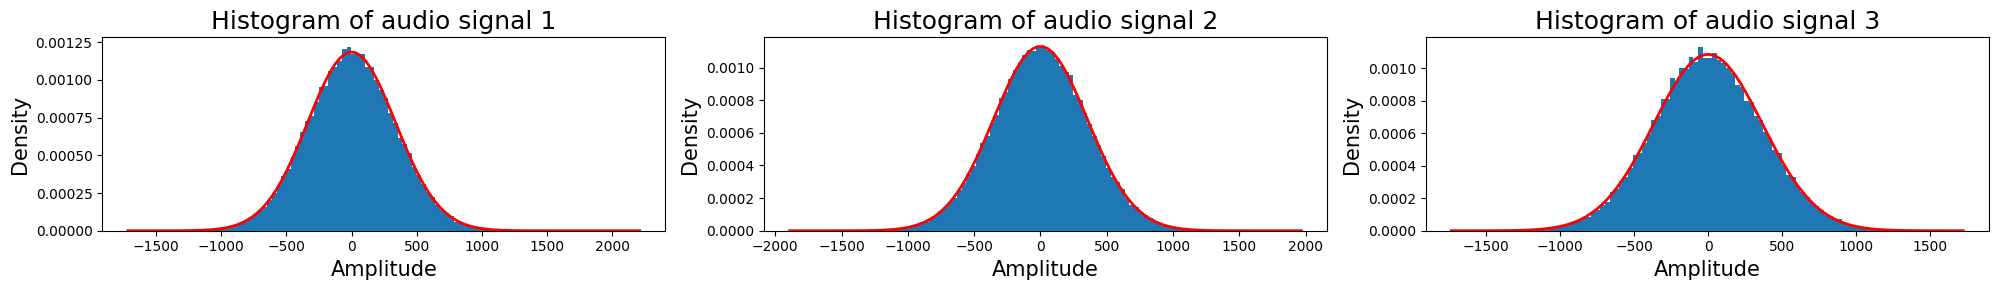

In [16]:
from scipy.stats import norm

# mean and variance of the signals

mean1 = np.mean(data1)
var1 = np.var(data1)

mean2 = np.mean(data2)
var2 = np.var(data2)

mean3 = np.mean(data3)
var3 = np.var(data3)

print('Mean of audio signal 1:', mean1)
print('Variance of audio signal 1:', var1)

print('Mean of audio signal 2:', mean2)
print('Variance of audio signal 2:', var2)

print('Mean of audio signal 3:', mean3)
print('Variance of audio signal 3:', var3)

# Fit with gaussian distribution the histograms of the signals


# Fit a normal distribution to the data
mu1, std1 = norm.fit(data1)
mu2, std2 = norm.fit(data2)
mu3, std3 = norm.fit(data3)

# Plot the histogram
plt.figure(figsize=(20, 3))

plt.subplot(1, 3, 1)
plt.hist(data1, bins=100, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu1, std1)
plt.plot(x, p, 'r', linewidth=2)
plt.xlabel('Amplitude', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title('Histogram of audio signal 1', fontsize=18)

plt.subplot(1, 3, 2)
plt.hist(data2, bins=100, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu2, std2)
plt.plot(x, p, 'r', linewidth=2)
plt.xlabel('Amplitude', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title('Histogram of audio signal 2', fontsize=18)

plt.subplot(1, 3, 3)
plt.hist(data3, bins=100, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu3, std3)
plt.plot(x, p, 'r', linewidth=2)
plt.xlabel('Amplitude', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title('Histogram of audio signal 3', fontsize=18)

plt.tight_layout()
plt.show()



## Differences between normal and anomaly

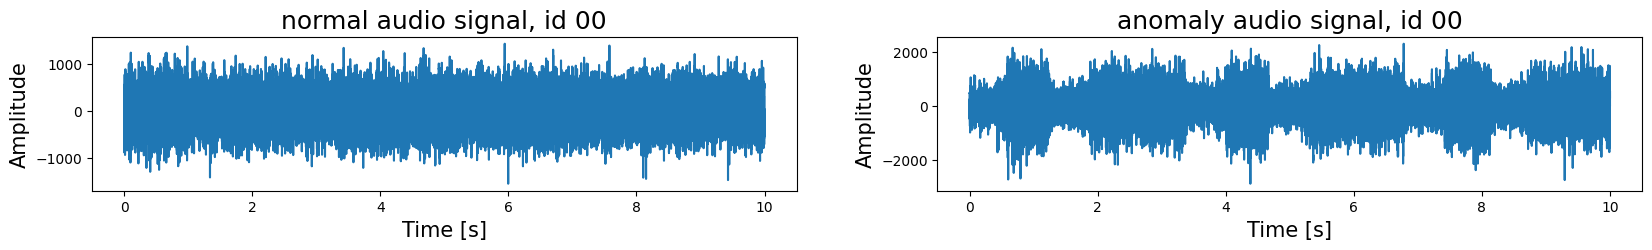

In [17]:
samplerate1, data1 = read('/home/luca/AML/challenge2/data/dev_data/dev_data/slider/test/normal_id_00_00000000.wav')
samplerate2, data2 = read('/home/luca/AML/challenge2/data/dev_data/dev_data/slider/test/anomaly_id_00_00000000.wav')

duration1 = len(data1)/samplerate1
time1 = np.arange(0,duration1,1/samplerate1) #time vector

duration2 = len(data2)/samplerate2
time2 = np.arange(0,duration2,1/samplerate2) #time vector


plt.figure(figsize=(20,2))
plt.subplot(1,2,1)
plt.plot(time1,data1)
plt.xlabel('Time [s]', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.title('normal audio signal, id 00', fontsize=18)

plt.subplot(1,2,2)
plt.plot(time2,data2)
plt.xlabel('Time [s]', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.title('anomaly audio signal, id 00', fontsize=18)

plt.show()

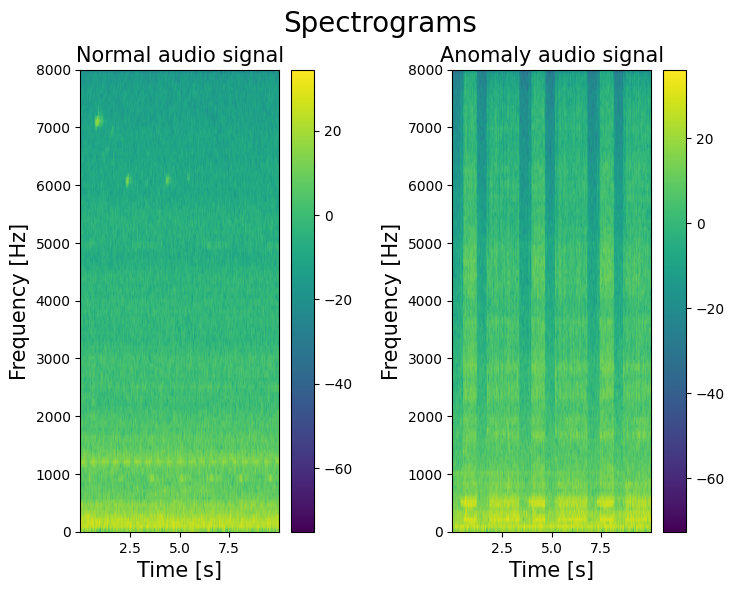

In [18]:
plt.figure(figsize=(8, 6))  # Increase figure size for better visualization

# Plot spectrogram of data1
plt.subplot(1, 2, 1)
plt.specgram(data1, Fs=samplerate1)
plt.xlabel('Time [s]', fontsize=15)
plt.ylabel('Frequency [Hz]', fontsize=15)
plt.title('Normal audio signal', fontsize=15)
plt.colorbar()

# Plot spectrogram of data2
plt.subplot(1, 2, 2)
plt.specgram(data2, Fs=samplerate2)
plt.xlabel('Time [s]', fontsize=15)
plt.ylabel('Frequency [Hz]', fontsize=15)
plt.title('Anomaly audio signal', fontsize=15)

plt.suptitle('Spectrograms', fontsize=20)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)  # You can adjust the width space as needed

plt.colorbar()  # Add color bar
plt.savefig('/home/luca/AML/challenge2/figures/spectrogram.eps', format='eps')
plt.show()



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


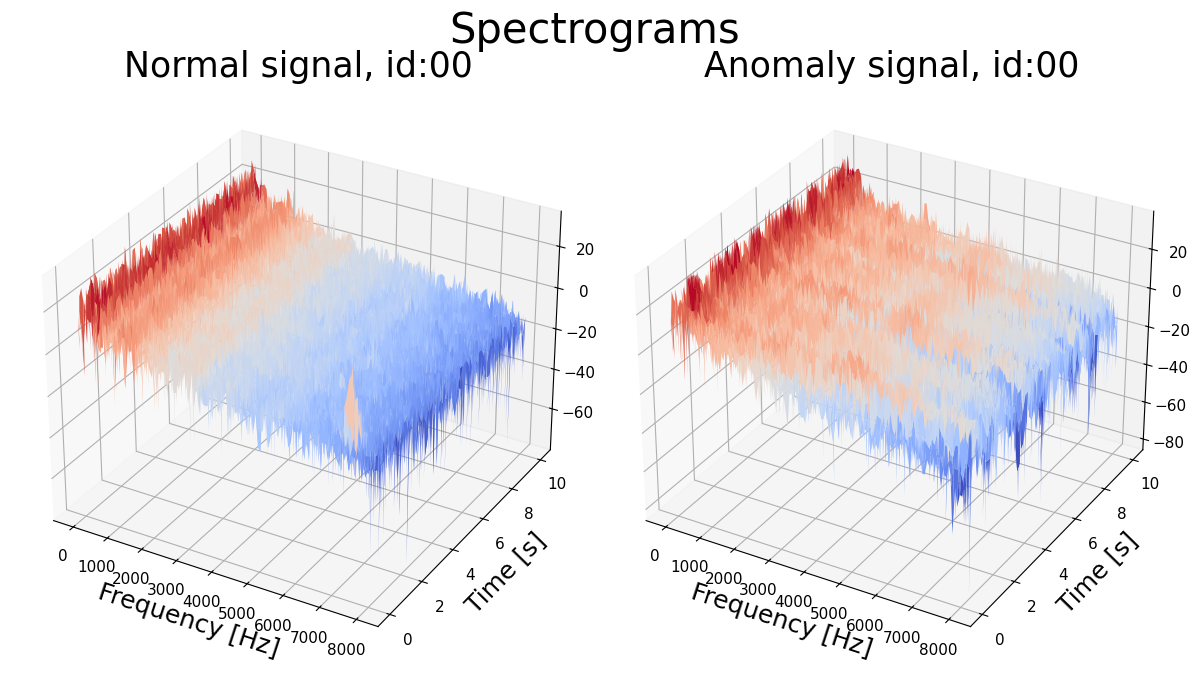

In [40]:
# extract the spectrum
freq_bins1, timestamps1, spec1 = signal.spectrogram(data1, samplerate1)
freq_bins2, timestamps2, spec2 = signal.spectrogram(data2, samplerate2)

# 3d plot
fig, axs = plt.subplots(1, 2, figsize=(12, 7), subplot_kw={'projection': '3d'})

plt.suptitle('Spectrograms', fontsize=30)

axs[0].plot_surface(freq_bins1[:, None], timestamps1[None, :], 10.0*np.log10(spec1), cmap=cm.coolwarm)
axs[0].set_xlabel('Frequency [Hz]', fontsize=18)
axs[0].set_ylabel('Time [s]', fontsize=18)
axs[0].set_title('Normal signal, id:00', fontsize=25)
axs[0].tick_params(axis='both', which='major', labelsize=11)

axs[1].plot_surface(freq_bins2[:, None], timestamps2[None, :], 10.0*np.log10(spec2), cmap=cm.coolwarm)
axs[1].set_xlabel('Frequency [Hz]', fontsize=18)
axs[1].set_ylabel('Time [s]', fontsize=18)
axs[1].set_title('Anomaly signal, id:00', fontsize=25)
axs[1].tick_params(axis='both', which='major', labelsize=11)

fig.tight_layout()  

plt.savefig('/home/luca/AML/challenge2/figures/Spectrograms3D.png', format='png')
plt.savefig('/home/luca/AML/challenge2/figures/Spectrograms3D.eps', format='eps')
plt.show()